<a href="https://colab.research.google.com/github/asrivastava0601/JanataHack-Computer-Vision-Hackathon/blob/master/AV_fastai_try01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 29.4MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
import numpy as np
import pandas as pd

import os
import random
import shutil as sh

import matplotlib.pyplot as plt

import fastai
from fastai.vision import *

In [0]:
from torchvision import models

In [0]:
import torch

In [0]:
train_data = pd.read_csv("/content/gdrive/My Drive/Analytics_Vidya_DL/train/train.csv")

In [8]:
train_data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [0]:
train_data['image_names'] = 'train/images/' + train_data['image_names'].astype(str)

In [10]:
train_data.head()

,image_names,emergency_or_not
0,train/images/1503.jpg,0
1,train/images/1420.jpg,0
2,train/images/1764.jpg,0
3,train/images/1356.jpg,0
4,train/images/1117.jpg,0


In [0]:
path = '/content/gdrive/My Drive/Analytics_Vidya_DL/'

tfms = get_transforms(do_flip=True)

training_data = ImageDataBunch.from_df(path, train_data, label_col= 'emergency_or_not' , ds_tfms= tfms ,valid_pct= 0.2, bs = 64, size= 150, seed = 42).normalize()

In [12]:
print("Class labels:",training_data.classes)

Class labels: [0, 1]


In [13]:
print("\n Number of classes: ",training_data.c)

2

In [14]:
len(training_data.train_ds), len(training_data.valid_ds)

(1317, 329)

Sample images in a batch:


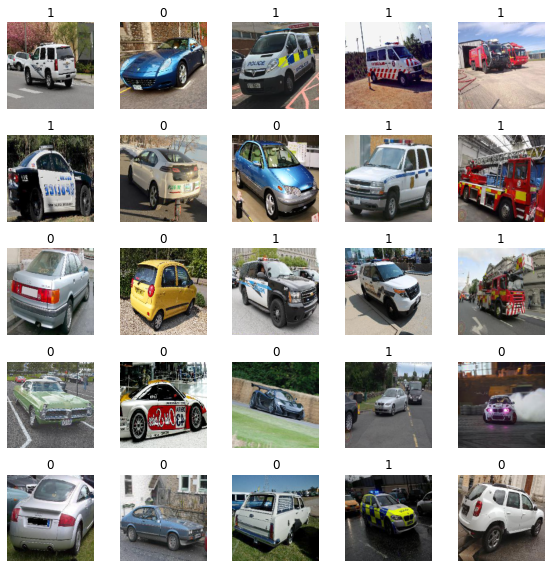

In [15]:
print("Sample images in a batch:")
training_data.show_batch(rows=5, figsize=(8, 8))

In [16]:
model_resnet101 = cnn_learner(training_data, models.resnet101, metrics = [error_rate,accuracy], pretrained = True)

model_resnet101.summary()

model_resnet101.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.633318,0.464107,0.118541,0.881459,02:29
1,0.504463,0.476478,0.103343,0.896657,00:22
2,0.430781,0.436782,0.127660,0.872340,00:21
3,0.334108,0.354073,0.085106,0.914894,00:21
4,0.269653,0.239358,0.085106,0.914894,00:21
5,0.228987,0.223538,0.088146,0.911854,00:21
6,0.186476,0.240645,0.072948,0.927052,00:21
7,0.154445,0.242731,0.072948,0.927052,00:21
8,0.133738,0.245343,0.072948,0.927052,00:21
9,0.118018,0.247416,0.072948,0.927052,00:21


Text(0.5, 1.0, 'Confusion Matrix: Model_resnet101')

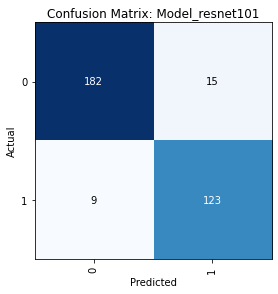

In [17]:
## We can stop at the epoch 6, as the accuracy does not increase further and the model just overfits the training data.
cm1 = ClassificationInterpretation.from_learner(model_resnet101)
cm1.plot_confusion_matrix()
plt.title("Confusion Matrix: Model_resnet101")

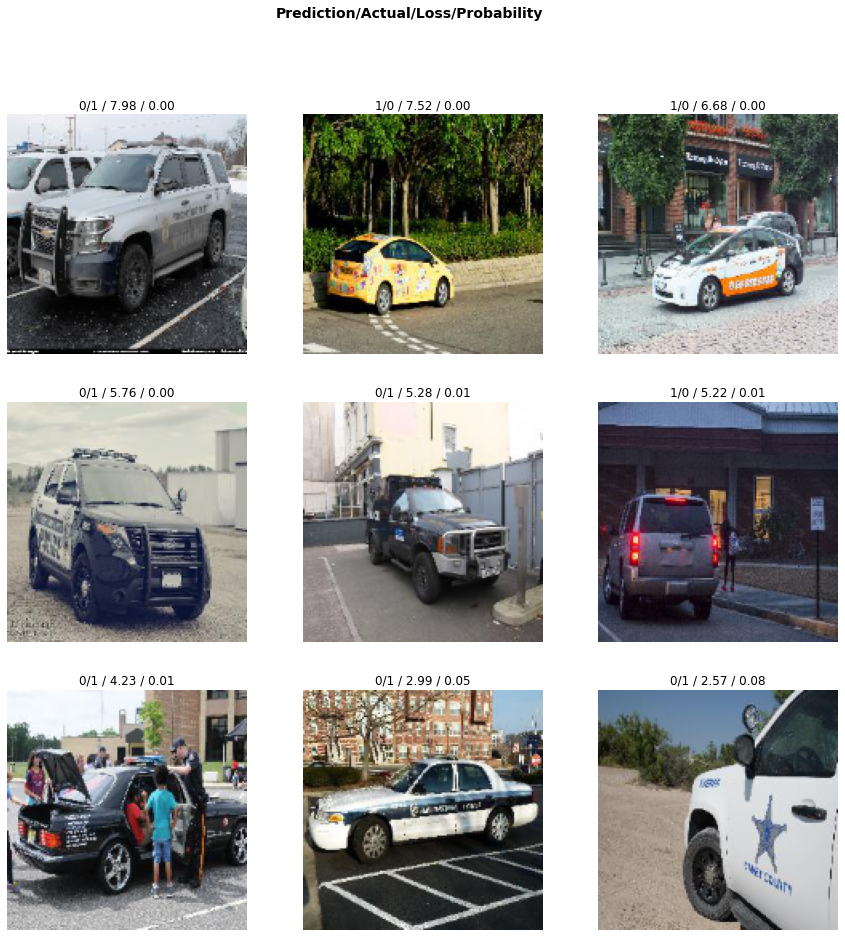

In [18]:
# Lets see the top losses, i.e. which images confused the model.
cm1.plot_top_losses(9, figsize=(15,15))

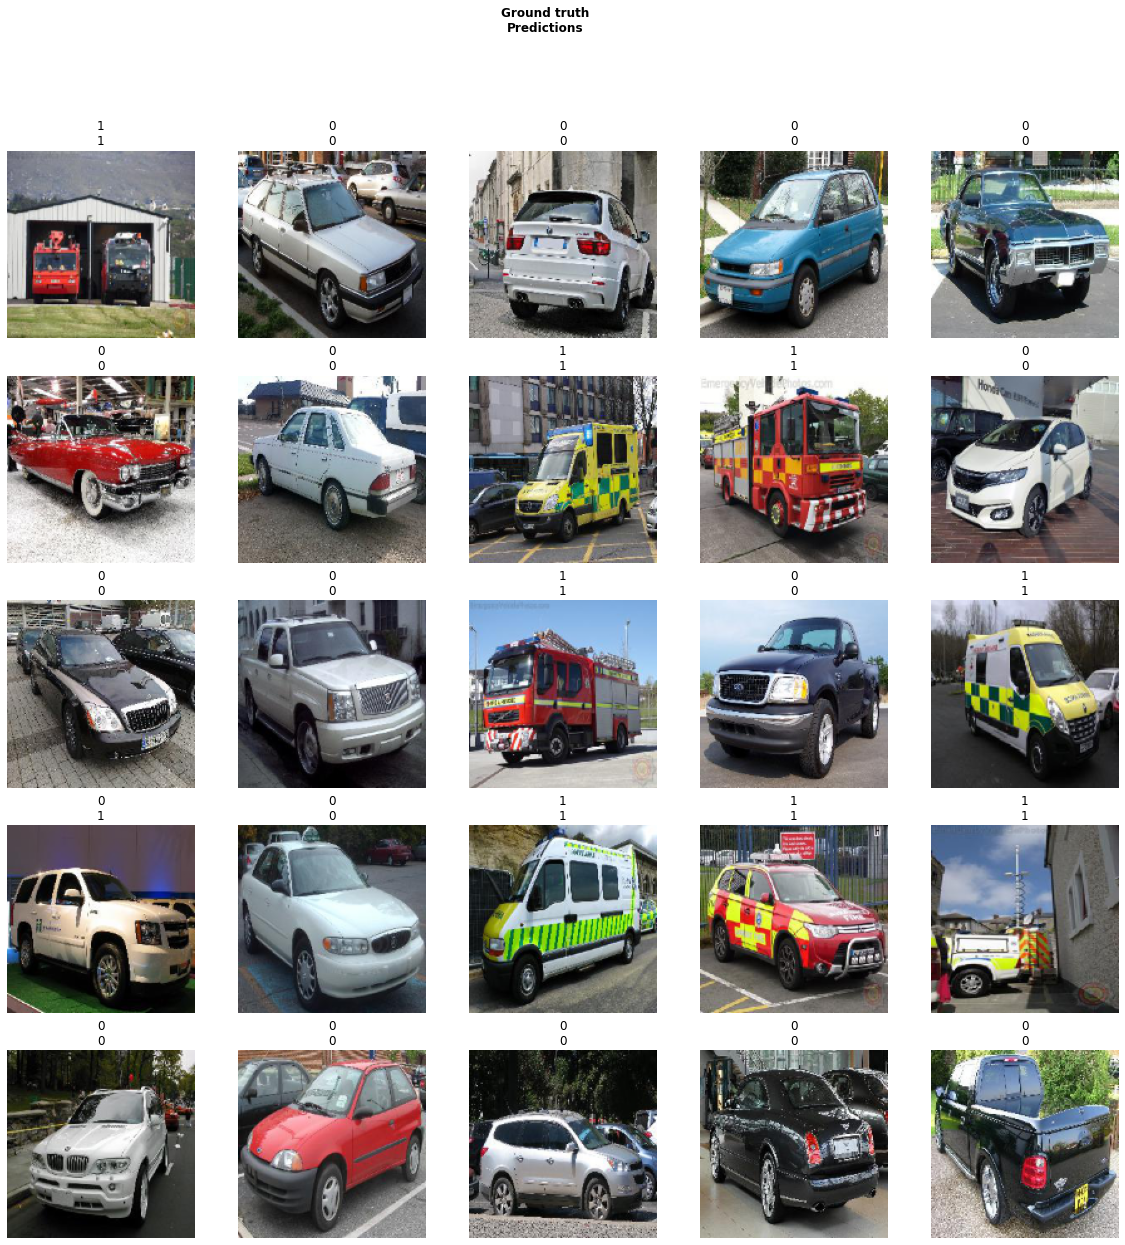

In [19]:
# Lets see the some of the results for the predictions.
model_resnet101.show_results()